# Simple Moving Average (SMA) and Exponentially Weighted Moving Average (EWMA)

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("airline_passengers.csv", index_col= 0, parse_dates= True)

In [3]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

### Simple Moving Average (SMA):

- Simple Moving Averages can be Calculated Using "rolling" function of Pandas.

In [5]:
df["Thousands of Passengers"].rolling(window= 6).mean()

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
                 ...    
1960-08-01    519.166667
1960-09-01    534.000000
1960-10-01    534.000000
1960-11-01    520.333333
1960-12-01    503.166667
Name: Thousands of Passengers, Length: 144, dtype: float64

In [6]:
df["SMA - 6 Months"] = df["Thousands of Passengers"].rolling(window= 6).mean()

In [7]:
df["SMA - 12 Months"] = df["Thousands of Passengers"].rolling(window= 12).mean()

In [9]:
df

,Thousands of Passengers,SMA - 6 Months,SMA - 12 Months
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
...,...,...,...
1960-08-01,606,519.166667,463.333333
1960-09-01,508,534.000000,467.083333
1960-10-01,461,534.000000,471.583333


<AxesSubplot:xlabel='Month'>

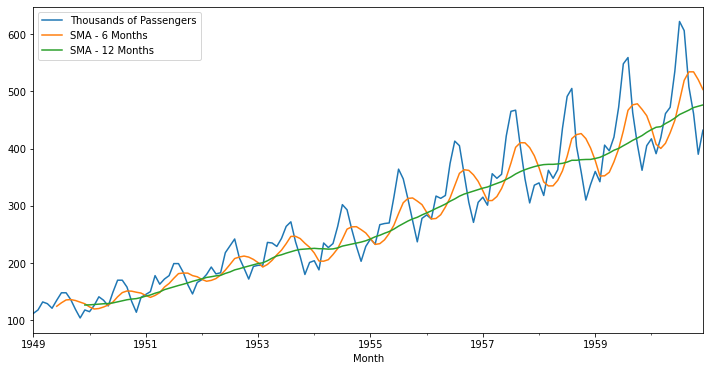

In [10]:
df.plot(figsize= (12,6))

# EWMA
## Exponentially Weighted Moving Average 

We just showed how to calculate the SMA based on some window. However, basic SMA has some weaknesses:
* Smaller windows will lead to more noise, rather than signal
* It will always lag by the size of the window
* It will never reach to full peak or valley of the data due to the averaging.
* Does not really inform you about possible future behavior, all it really does is describe trends in your data.
* Extreme historical values can skew your SMA significantly

To help fix some of these issues, we can use an EWMA (Exponentially weighted moving average)

EWMA will allow us to reduce the lag effect from SMA and it will put more weight on values that occured more recently (by applying more weight to the more recent values, thus the name). The amount of weight applied to the most recent values will depend on the actual parameters used in the EWMA and the number of periods given a window size.
Here is the shorter version of the explanation behind EWMA.

The formula for EWMA is:
### $y_t =   \frac{\sum\limits_{i=0}^t w_i x_{t-i}}{\sum\limits_{i=0}^t w_i}$

Where $x_t$ is the input value, $w_i$ is the applied weight (Note how it can change from $i=0$ to $t$), and $y_t$ is the output.

Now the question is, how to we define the weight term $w_i$?

This depends on the <tt>adjust</tt> parameter you provide to the <tt>.ewm()</tt> method.

When <tt>adjust=True</tt> (default) is used, weighted averages are calculated using weights equal to $w_i = (1 - \alpha)^i$

which gives

### $y_t = \frac{x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2 x_{t-2} + ...
+ (1 - \alpha)^t x_{0}}{1 + (1 - \alpha) + (1 - \alpha)^2 + ...
+ (1 - \alpha)^t}$

When <tt>adjust=False</tt> is specified, moving averages are calculated as:

### $\begin{split}y_0 &= x_0 \\
y_t &= (1 - \alpha) y_{t-1} + \alpha x_t,\end{split}$

which is equivalent to using weights:

 \begin{split}w_i = \begin{cases}
    \alpha (1 - \alpha)^i & \text{if } i < t \\
    (1 - \alpha)^i        & \text{if } i = t.
\end{cases}\end{split}

When <tt>adjust=True</tt> we have $y_0=x_0$ and from the last representation above we have 
$y_t=\alpha x_t+(1−α)y_{t−1}$, therefore there is an assumption that $x_0$ is not an ordinary value but rather an exponentially weighted moment of the infinite series up to that point.

For the smoothing factor $\alpha$ one must have $0<\alpha≤1$, and while it is possible to pass <em>alpha</em> directly, it’s often easier to think about either the <em>span</em>, <em>center of mass</em> (com) or <em>half-life</em> of an EW moment:

\begin{split}\alpha =
 \begin{cases}
     \frac{2}{s + 1},               & \text{for span}\ s \geq 1\\
     \frac{1}{1 + c},               & \text{for center of mass}\ c \geq 0\\
     1 - \exp^{\frac{\log 0.5}{h}}, & \text{for half-life}\ h > 0
 \end{cases}\end{split}

* <strong>Span</strong> corresponds to what is commonly called an “N-day EW moving average”.
* <strong>Center of mass</strong> has a more physical interpretation and can be thought of in terms of span: $c=(s−1)/2$
* <strong>Half-life</strong> is the period of time for the exponential weight to reduce to one half.
* <strong>Alpha</strong> specifies the smoothing factor directly.

In [11]:
df["Thousands of Passengers"].ewm(span= 12).mean()

Month
1949-01-01    112.000000
1949-02-01    115.250000
1949-03-01    121.787529
1949-04-01    124.064224
1949-05-01    123.231685
                 ...    
1960-08-01    494.898620
1960-09-01    496.914217
1960-10-01    491.388952
1960-11-01    475.790652
1960-12-01    469.053629
Name: Thousands of Passengers, Length: 144, dtype: float64

In [12]:
df["EWMA - 12 Months"] = df["Thousands of Passengers"].ewm(span= 12).mean()

In [13]:
df

,Thousands of Passengers,SMA - 6 Months,SMA - 12 Months,EWMA - 12 Months
Month,,,,
1949-01-01,112,NaN,NaN,112.000000
1949-02-01,118,NaN,NaN,115.250000
1949-03-01,132,NaN,NaN,121.787529
1949-04-01,129,NaN,NaN,124.064224
1949-05-01,121,NaN,NaN,123.231685
...,...,...,...,...
1960-08-01,606,519.166667,463.333333,494.898620
1960-09-01,508,534.000000,467.083333,496.914217
1960-10-01,461,534.000000,471.583333,491.388952


<AxesSubplot:xlabel='Month'>

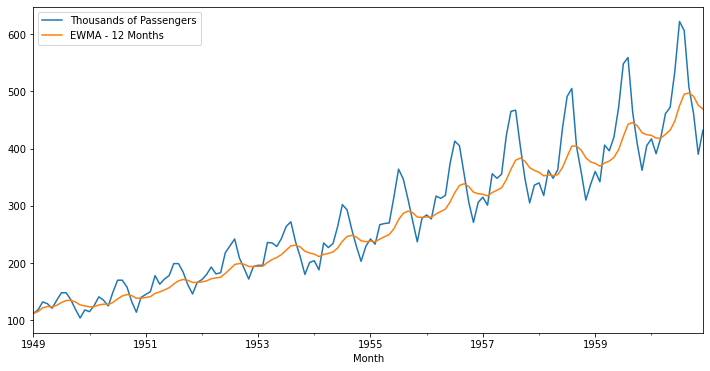

In [14]:
df[["Thousands of Passengers", "EWMA - 12 Months"]].plot(figsize= (12,6))

<AxesSubplot:xlabel='Month'>

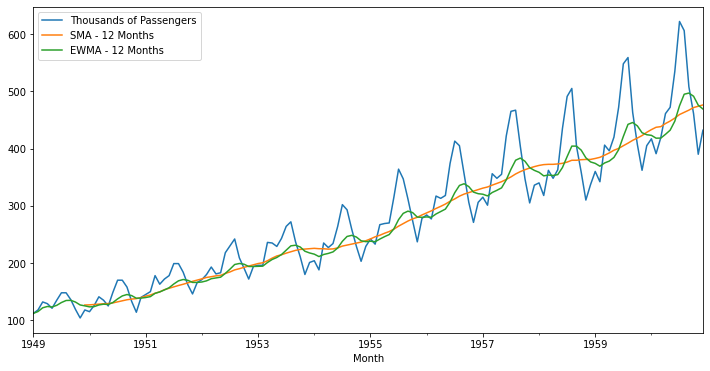

In [15]:
df[["Thousands of Passengers", "SMA - 12 Months", "EWMA - 12 Months"]].plot(figsize= (12,6))